<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Fourier-transform" data-toc-modified-id="Fourier-transform-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Fourier transform</a></span><ul class="toc-item"><li><span><a href="#Convolution-in-the-Fourier-domain" data-toc-modified-id="Convolution-in-the-Fourier-domain-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Convolution in the Fourier domain</a></span></li><li><span><a href="#Hybrid-images" data-toc-modified-id="Hybrid-images-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Hybrid images</a></span></li></ul></li></ul></div>

### Convolution in the Fourier domain

Implement a function `fourier_conv(img:np.ndarray, kernel:np.ndarray) -> np.ndarray` that performs a 2D-convolution of the input image `img` with the convolution kernel `kernel` in the Fourier domain.

Validate via the function `np.allclose` and an example image that your result is equal to the result when performing the convolution in the spatial domain with `scipy.ndimage.convolve`.

In [3]:
import numpy as np
import scipy.ndimage as ndimage
import matplotlib.pyplot as plt
from scipy import misc
import numpy as np
#from skimage.io import imread
import copy
from PIL import Image
#import skimage
import cv2
from scipy import fft

In [4]:
def fourier_conv(img:np.ndarray, kernel:np.ndarray) -> np.ndarray:
    padding = ((img.shape[0] - kernel.shape[0])//2, (img.shape[1] - kernel.shape[1])//2) 
    kernel = np.pad(kernel, ((padding[0],),(padding[1],)))
    kernel = fft.ifftshift(kernel)
    result = np.real(fft.ifft2(fft.fft2(img) * fft.fft2(kernel)))
    
    return result 

Test your function:

Is your solution correct: True


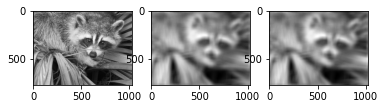

In [5]:
img = np.float32(misc.face(gray=True))[0:-1, 0:-1]
kernel = np.ones((51,51), dtype=float)

res_fourier = fourier_conv(img, kernel)
res_spatial = ndimage.convolve(img, kernel, mode='wrap') # Which mode do you have to use?

print(f"Is your solution correct: {np.allclose(res_fourier, res_spatial)}")

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(res_spatial, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(res_fourier, cmap='gray')

### Hybrid images

Read the paper

*Hybrid images* by Aude Oliva et al. (https://dl.acm.org/doi/abs/10.1145/1141911.1141919).

Implement a function that takes two input images and combines them by high pass-filtering the first one and low pass-filtering the second one, so that in the resulting images, the first original image can be seen when viewing from a close distance and the second original image can be seen from a far distance.

(474, 474, 4)
(302, 474, 4)


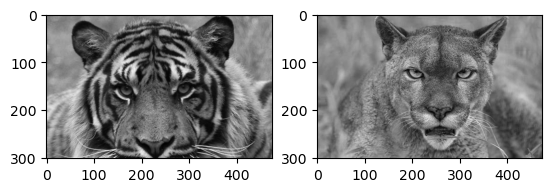

In [18]:
# images to combine
img_1 = imread('tiger.png')
#img_2 = imread('tiger.png')
img_2 = imread('puma.png')

print(img_1.shape)
print(img_2.shape)
# function to work with gray scales
def rgb2gray(img) -> np.ndarray:
    r, g, b = img[:,:,0], img[:,:,1], img[:,:,2] 
    gamma = 1.04

    r_cte, g_cte, b_cte = 0.2126, 0.7152, 0.0722
    gray_img = r_cte * r ** gamma + g_cte * g ** gamma + b_cte * b ** gamma
    
    return gray_img

# gray scale images, for low and high pass filters
img_low = rgb2gray(img_1)[33:335,]
img_high = rgb2gray(img_2)


# plot of images
_, (ax1, ax2) = plt.subplots(1, 2)
figure_size = plt.gcf().get_size_inches()
plt.gcf().set_size_inches(figure_size)
ax1.imshow(img_low, cmap="gray")
ax2.imshow(img_high, cmap="gray")
plt.show()

In [15]:
# function to get hybrid images
def hybrid_image(img1: np.ndarray, img2: np.ndarray) -> np.ndarray:
    # low pass filter (Gaussian filter applied toremoves noise)
    lpf = skimage.filters.gaussian(img_low, sigma=20)
    plt.subplot(1,3,1)
    plt.imshow(lpf, cmap='gray')
    

    # high pass filter (Sobel filter to get edges/details)
    hpf = skimage.filters.sobel(img_high)
    plt.subplot(1,3,2)
    plt.imshow(hpf, cmap='gray')
    
    result = cv2.addWeighted(hpf,0.5,lpf,0.5,0)
    
    return result

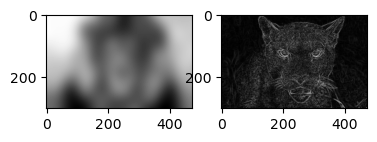

In [16]:
hybrid_img = hybrid_image(img_low, img_high)

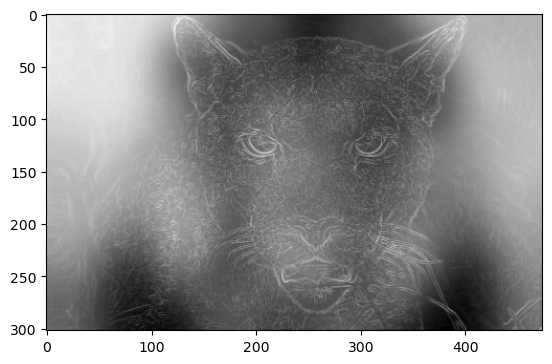

In [17]:
_, (ax1) = plt.subplots(1, 1)
figure_size = plt.gcf().get_size_inches()
plt.gcf().set_size_inches(figure_size)
ax1.imshow(hybrid_img, cmap="gray")
plt.show()